# Introduction

- The purpose of this project is to elvate the big five personality traits (Openness to experience, Conscientiousness, Extraversion, Agreeableness, Neuroticism) https://www.verywell.com/the-big-five-personality-dimensions-2795422. In relation to gender difference between males and females.

- The second part of this project conducts analysis to look at difference been mean scores between males and females and investigate whether there is a signifcant difference between them.

- This data comes from the Open Source Psychometrics Project (https://openpsychometrics.org).

- This dataset consists of 19720 participants (11985 females and 7608 males).

In [1]:
library(ggplot2)
library(car)

#Raw file
http://openpsychometrics.org/_rawdata/BIG5.zip

#Website
https://openpsychometrics.org/tests/IPIP-BFFM/

In [2]:
pd <- read.csv("/home/james/Downloads/BIG5/data.csv", header= TRUE)

In [3]:
head(pd)

race,age,engnat,gender,hand,source,country,E1,E2,E3,⋯,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
3,53,1,1,1,1,US,4,2,5,⋯,4,1,3,1,5,1,4,2,5,5
13,46,1,2,1,1,US,2,2,3,⋯,3,3,3,3,2,3,3,1,3,2
1,14,2,2,1,1,PK,5,1,1,⋯,4,5,5,1,5,1,5,5,5,5
3,19,2,2,1,1,RO,2,5,2,⋯,4,3,5,2,4,2,5,2,5,5
11,25,2,2,1,2,US,3,1,3,⋯,3,1,1,1,3,1,3,1,5,3
13,31,1,2,1,2,US,1,5,2,⋯,4,2,1,3,3,5,5,4,5,3


- Sum each of the five variable to complie a total score

- As there are different genders (1=Male, 2=Female, 3=Other 0=missed) Other and missed were removed using the  subset function.

In [4]:
pd$Etotal  <- rowSums(pd[ ,8:17])
pd$Ntotal  <- rowSums(pd[ ,18:27])
pd$Atotal  <- rowSums(pd[ ,28:37])
pd$Ctotal  <- rowSums(pd[ ,38:47])
pd$Ototal  <- rowSums(pd[ ,48:57])

female <- subset(pd, pd$gender == "2")
male <- subset(pd, pd$gender == "1")
pd <- rbind(female, male)
pd$Sex<-recode(pd$gender,"1='M'; 2='F'")

# Gender difference in personality

- These five density plots show personality differents between Males and Females. The blue overlay is male and the red overlay is female. 
- The lines on each graph response the mean scores (Males are blue  and Females are red).
- Note: higher or lower score on each item do not signify positive or negative traits.

# Openness to experience

Openness to experience is

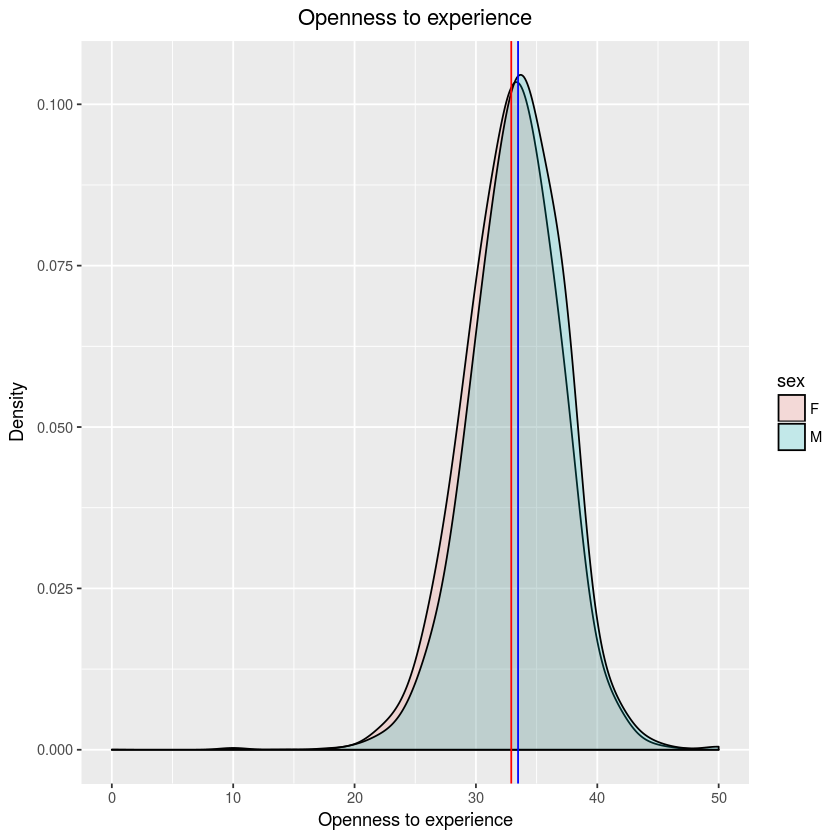

In [24]:
ggplot() + 
  geom_density(data=pd, aes(x=Ototal, group=sex, fill=sex), alpha=0.2, adjust=2) + 
  geom_vline(xintercept = mean(male$Ototal), colour = "blue") +
  geom_vline(xintercept = mean(female$Ototal), colour = "red") +
  xlab("Openness to experience") +
  ylab("Density") +
  ggtitle("Openness to experience") +
  theme(plot.title = element_text(hjust = 0.5))

# Conscientiousness

Conscientiousness

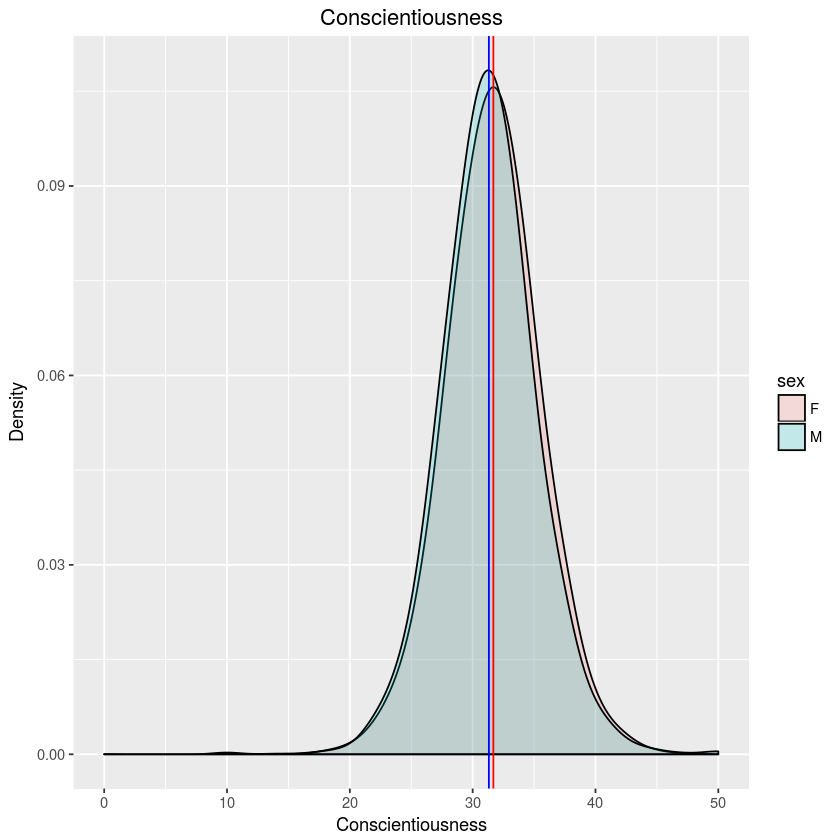

In [20]:
ggplot() + 
  geom_density(data=pd, aes(x=Ctotal, group=sex, fill=sex), alpha=0.2, adjust=2) + 
  geom_vline(xintercept = mean(male$Ctotal), colour = "blue") +
  geom_vline(xintercept = mean(female$Ctotal), colour = "red") +
  xlab("Conscientiousness") +
  ylab("Density") +
  ggtitle("Conscientiousness") +
  theme(plot.title = element_text(hjust = 0.5))

# Extraversion

Extraversion

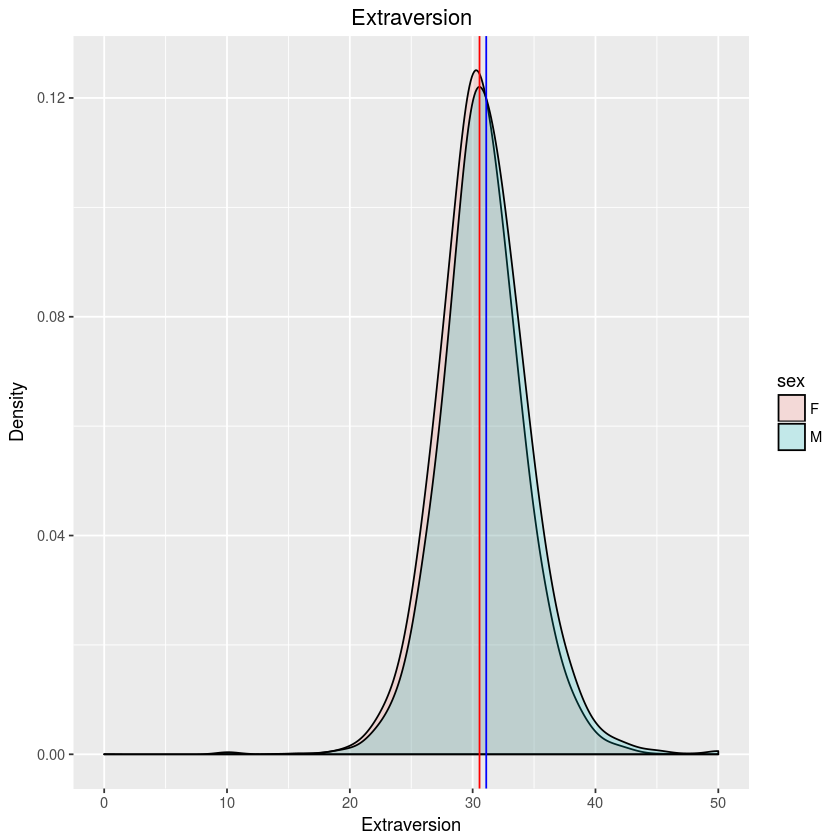

In [21]:
ggplot() + 
  geom_density(data = pd, aes(x=Etotal, group=sex, fill=sex), alpha=0.2, adjust=2) +
  geom_vline(xintercept = mean(male$Etotal), colour = "blue") +
  geom_vline(xintercept = mean(female$Etotal), colour = "red") +
  xlab("Extraversion") +
  ylab("Density") +
  ggtitle("Extraversion") +
  theme(plot.title = element_text(hjust = 0.5))

# Agreeableness

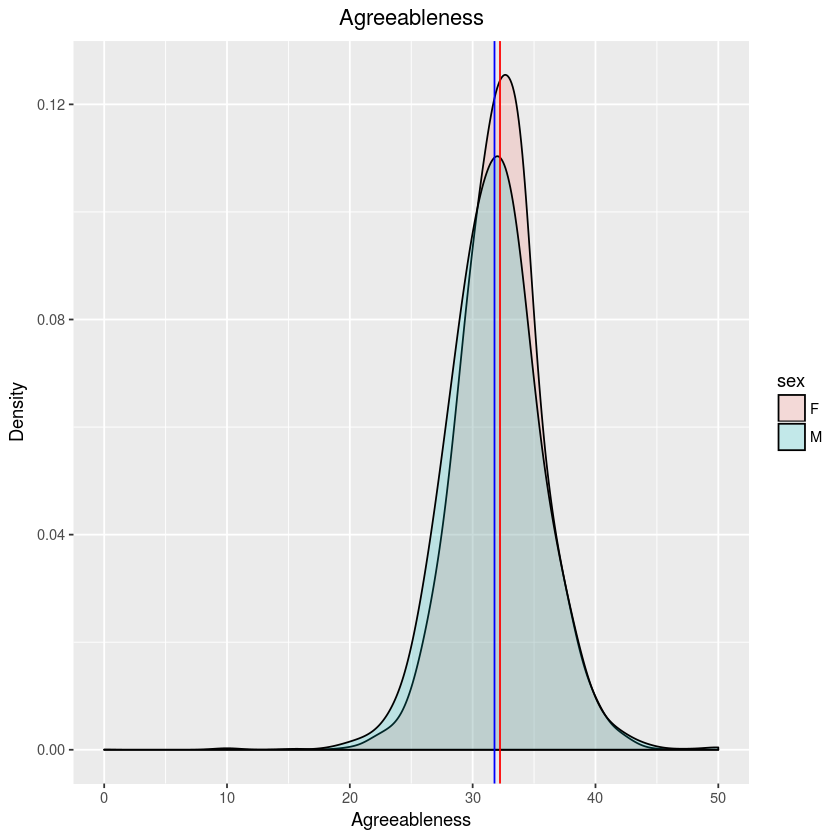

In [22]:
ggplot() + 
  geom_density(data=pd, aes(x=Atotal, group=sex, fill=sex), alpha=0.2, adjust=2) + 
  geom_vline(xintercept=mean(male$Atotal), colour = "blue") +
  geom_vline(xintercept=mean(female$Atotal), colour = "red") +
  xlab("Agreeableness") +
  ylab("Density") +
  ggtitle("Agreeableness") +
  theme(plot.title = element_text(hjust = 0.5))

#  Neuroticism

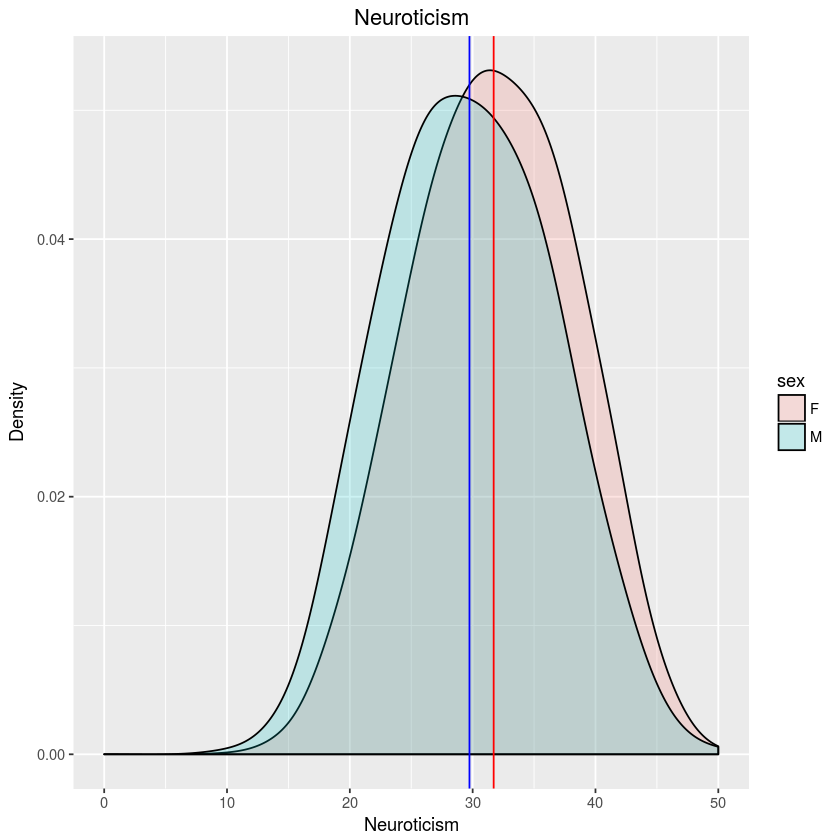

In [23]:
ggplot() +
  geom_density(data = pd, aes(x=Ntotal, group=sex, fill = sex), alpha=0.2, adjust=2) +
  geom_vline(xintercept = mean(male$Ntotal), colour = "blue") +
  geom_vline(xintercept = mean(female$Ntotal), colour = "red") +
  xlab("Neuroticism") +
  ylab("Density") +
  ggtitle("Neuroticism") +
  theme(plot.title = element_text(hjust = 0.5))

The most signifcsnt difference would appear to come from agreeableness and Neuroticism, while female still had a higher mean score for Conscientiousness. However, males on the other had a higher mean score for Openness to experience and Extraversion. 

# Analysis

- Is there a signifcant difference between Male and Female personailty types?

In [27]:
model <- manova(cbind(Etotal, Ntotal, Atotal, Ctotal, Ototal) ~ gender, data = pd)
summary.aov(model)

 Response Etotal :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1   1393  1392.9  113.22 < 2.2e-16 ***
Residuals   19591 241015    12.3                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Ntotal :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1  18070 18069.8  408.95 < 2.2e-16 ***
Residuals   19591 865646    44.2                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Atotal :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1    941  940.61  75.385 < 2.2e-16 ***
Residuals   19591 244443   12.48                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Ctotal :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1    624  623.62  41.524 1.192e-10 ***
Residuals   19591 294223   15.02                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

- This MANOVA show that there is a signifcant difference in personality types between Males and Females.